In [2]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fix_yahoo_finance as yf
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:

file = open("./important_values.txt","r")
whole = file.read()
whole = whole.split(" ")

ticker_name = whole[0]
label_size = int(whole[1])

#print(ticker_name)
#print(label_size)

data = yf.download(ticker_name, start="2011-01-01")
the_safe_zone = np.zeros(len(data))

for i in range(len(data)):
    the_safe_zone[i] = float((data.iloc[i].Open + data.iloc[i].Close) / 2)

the_safe_zone = np.array(the_safe_zone)
the_safe_zone = the_safe_zone.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
safe_scaled = scaler.fit_transform(the_safe_zone)


[*********************100%***********************]  1 of 1 downloaded


In [4]:

past_values = safe_scaled[-150:]
past_values = past_values.reshape(-1,150,1)

#print(past_values.shape)

model_name = ticker_name + "_" + str(label_size)
model = load_model("./"+model_name+".h5")
future_values = model.predict(past_values)


In [5]:
past_values = past_values.reshape(150,1)
past_values = scaler.inverse_transform(past_values)
future_values = scaler.inverse_transform(future_values)

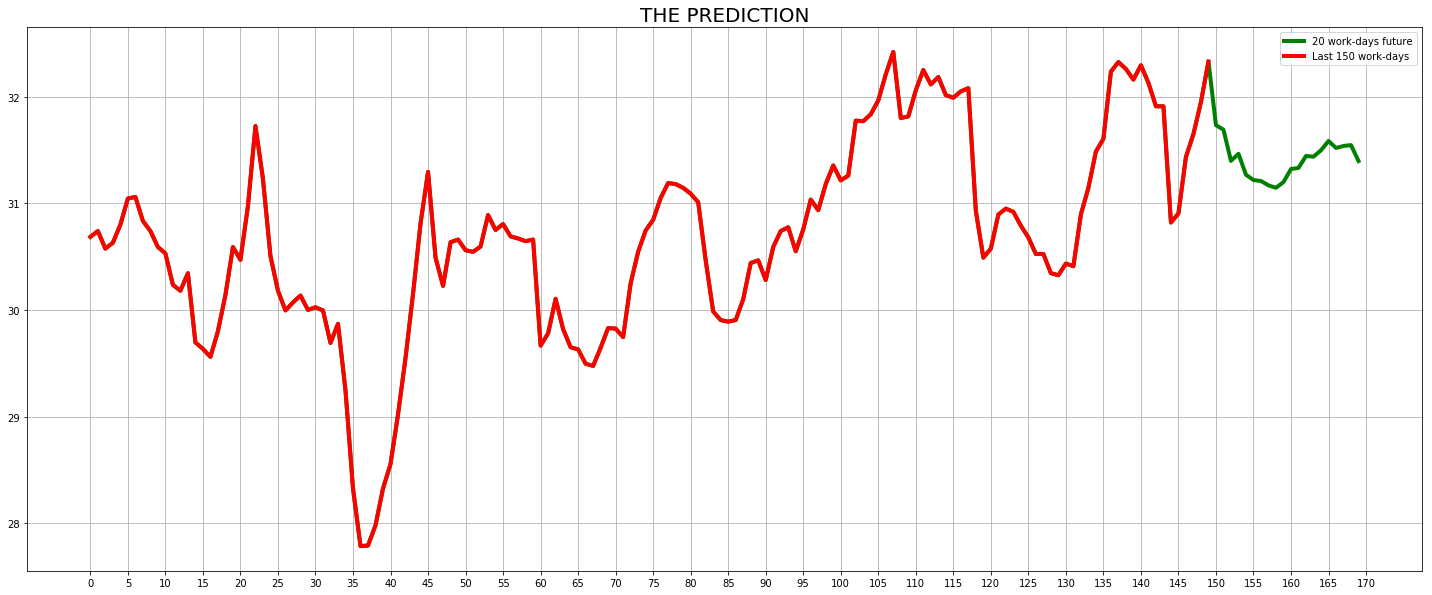

In [24]:

plotter = []

for i in range(150):
    j = 150-i
    plotter.append(the_safe_zone[-j][0])

for i in range(20):
    plotter.append(future_values[0][i])


plt.figure(figsize=(25,10))
plt.plot(plotter, c="green", linewidth=4, label="20 work-days future")
plt.plot(past_values, c="red", linewidth=4, label="Last 150 work-days")
plt.grid()
plt.legend()
plt.xticks(np.arange(0,171,5))
plt.title("THE PREDICTION",fontsize=20)
plt.savefig("the_prediction.png")